In [1]:
import pandas as pd
import numpy as np

In [3]:
path_to_file = './data/house_price_prediction.csv'
df = pd.read_csv(path_to_file)

In [4]:
# Preparing the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['SalePrice']
X = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd']]

SEED = 20

# Use 50% of our data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=SEED)

In [5]:
from sklearn.tree import DecisionTreeRegressor

# define the regressor model by using the DecisionTreeRegressor class
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [6]:
# Predictions with the Multivariate Regression Model

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2).T})
print(results)

      Actual  Predicted
954   127500   124000.0
326   324000   297000.0
308    82500   137000.0
1058  335000   313000.0
416   149500   162000.0
...      ...        ...
885   328900   367294.0
1080  145000   171500.0
736    93500    90200.0
723   135000   127000.0
481   374000   239000.0

[730 rows x 2 columns]


In [7]:
from sklearn.metrics import r2_score

# How much our model explains of our test data
r2_score(y_test, y_pred)

0.694784530240845

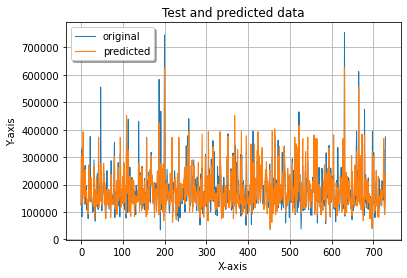

In [8]:
import matplotlib.pyplot as plt

# Visualize the original and predicted data in a plot.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("Test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluating the Multivariate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 31083.30
Mean squared error: 1995842334.23
Root mean squared error: 44674.85
